<h1 style="font-size: 3em; text-align: center;">ВАРИАНТ 1</h1>
<img src="https://i.ytimg.com/vi/D6fWmL9IsZU/maxresdefault.jpg">

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling

# Считывание тренировочной и тестовой выборок

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
pandas_profiling.ProfileReport(train)

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S
1,426,0,3,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S
2,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S
3,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
4,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S
...,...,...,...,...,...,...,...,...,...,...,...,...
529,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,S
530,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,NaN,S
531,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S
532,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,NaN,S


# Предобработка данных

In [6]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S
1,426,0,3,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S
2,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S
3,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
4,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S
...,...,...,...,...,...,...,...,...,...,...,...,...
529,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,S
530,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,NaN,S
531,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S
532,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,NaN,S


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
def process_data(data: pd.DataFrame):
    # Для начала избавимся от уникальных полей, которые по очевидным причинам избыточны в обучении.
    data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
    
    # Далее переведем категориальные признаки в количественные через OHE.
    for column in ('Sex', 'Embarked'):
        tmp = pd.get_dummies(data[column], prefix=column, prefix_sep='-')
        data = pd.concat([data, tmp], axis=1)

    data = data.drop(['Sex', 'Embarked'], axis=1)
    
    # Избавление от NaNов средним значением
    data = data.fillna(round(data.mean()))
    
    # Стандартизация количественных колонок (Age, Fare)
    standard_scaler = StandardScaler()
    data[['Fare', 'Age']] = standard_scaler.fit_transform(data[['Fare', 'Age']])
    
    return data

In [9]:
train = process_data(train)
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex-female,Sex-male,Embarked-C,Embarked-Q,Embarked-S
0,0,3,0.023660,3,1,-0.140233,1,0,0,0,1
1,0,3,0.023660,0,0,-0.489517,0,1,0,0,1
2,1,1,1.005247,0,1,3.423627,1,0,0,0,1
3,1,2,-0.429380,0,2,-0.350507,1,0,0,0,1
4,1,2,-2.166033,2,1,0.119253,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
529,0,3,-2.090526,3,2,-0.093577,1,0,0,0,1
530,0,3,-2.015019,3,1,-0.224439,1,0,0,0,1
531,0,3,0.023660,3,1,-0.140233,0,1,0,0,1
532,1,2,-0.429380,2,3,-0.269018,1,0,0,0,1


Также выделим колонку Survived в отдельный датафрейм

In [10]:
survived_col = train.pop('Survived')

# Разделение выборки и функция ROC-AUC

Посмотрим распределение выживших и не очень

<AxesSubplot:>

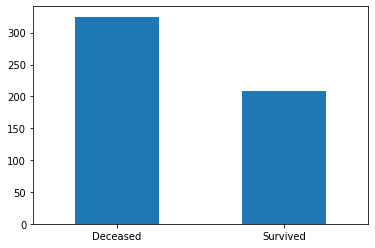

In [11]:
survived_info = survived_col.value_counts()
survived_info.index = ['Deceased', 'Survived']
survived_info.plot.bar(rot=0)

Функция для построения графика ROC-AUC

In [12]:
from sklearn.metrics import roc_auc_score, roc_curve

In [13]:
def roc_auc_plot(y_train, y_train_predicted, y_val, y_val_predicted):
    train_auc = roc_auc_score(y_train, y_train_predicted)
    test_auc = roc_auc_score(y_val, y_val_predicted)

    plt.figure(figsize=(10,7))
    plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
    plt.plot(*roc_curve(y_val, y_val_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
    legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.show()

# Алгоритмы классификации

Разделяем выборку на тренировочную и тестовую

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_train, train_test, survived_train, survived_test = train_test_split(train, survived_col, train_size=0.7, random_state=420)

### KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_train, survived_train)

KNeighborsClassifier(n_neighbors=10)

In [18]:
survived_train_predicted_knn = knn.predict_proba(train_train)[:, 1]
survived_test_predicted_knn = knn.predict_proba(train_test)[:, 1]

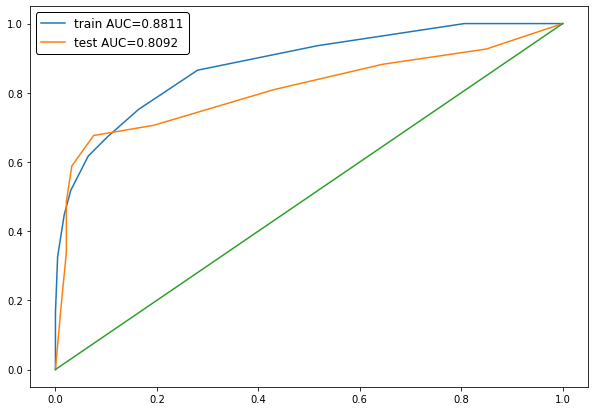

In [19]:
roc_auc_plot(survived_train, survived_train_predicted_knn, survived_test, survived_test_predicted_knn)

### Логистическая регрессия

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lg = LogisticRegression(solver='liblinear', C=5, random_state=42)
lg.fit(train_train, survived_train)

LogisticRegression(C=5, random_state=42, solver='liblinear')

In [22]:
survived_train_predicted_lg = lg.predict_proba(train_train)[:, 1]
survived_test_predicted_lg = lg.predict_proba(train_test)[:, 1]

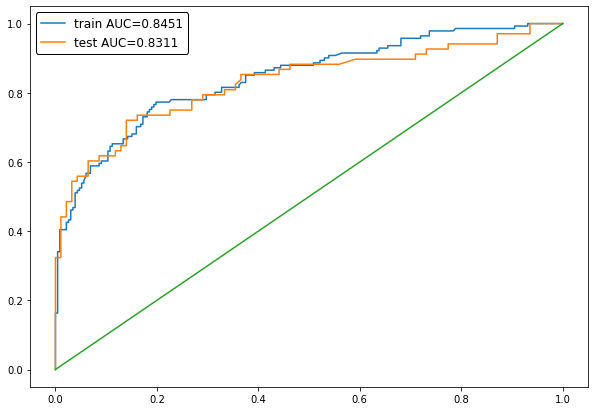

In [23]:
roc_auc_plot(survived_train, survived_train_predicted_lg, survived_test, survived_test_predicted_lg)

### Случайный лес

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=400)
rfc.fit(train_train, survived_train)

RandomForestClassifier(max_depth=400, n_estimators=1000)

In [80]:
survived_train_predicted_rfc = rfc.predict_proba(train_train)[:, 1]
survived_test_predicted_rfc = rfc.predict_proba(train_test)[:, 1]

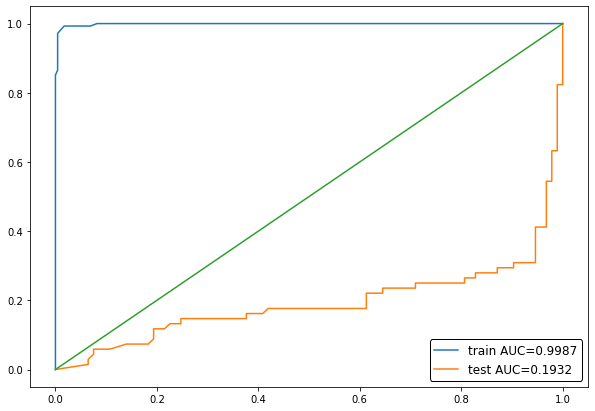

In [81]:
a = list(map(lambda x: x, survived_train_predicted_rfc))
b = list(map(lambda x: 1 - x, survived_test_predicted_rfc))
roc_auc_plot(survived_train, a, survived_test, b)

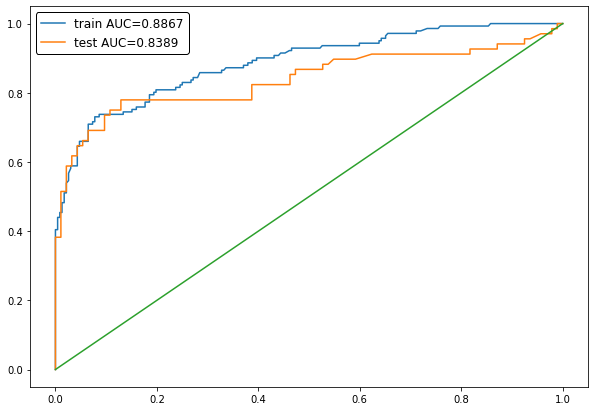

In [57]:
roc_auc_plot(survived_train, survived_train_predicted_rfc, survived_test, survived_test_predicted_rfc)

# Подбор оптимальной модели

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
param_grid_lr = {#'penalty' : ['l1', 'l2'],
#     'C' : np.arange(1, 100, 1),
    #'solver' : ['liblinear']
}

#     {'classifier' : [RandomForestClassifier()],
#     'classifier__n_estimators' : list(range(6, 101, 8)),
#     'classifier__max_features' : list(range(6, 32, 8)),
#     'classifier__max_depth' : list(range (2, 13, 2))},
#     {'classifier' : [KNeighborsClassifier()],
#     'classifier__n_neighbors' : list(range(3, 40, 3)),
#      'classifier__weights' : ['uniform', 'distance']}
# ]

In [110]:
grid_lr.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [111]:
pipe_lr = GradientBoostingClassifier()
# pipe_rfc = Pipeline([('classifier' , RandomForestClassifier())])
# pipe_knc = Pipeline([('classifier' , KNeighborsClassifier())])

In [112]:
grid_lr = GridSearchCV(estimator=pipe_lr,
            param_grid=param_grid_lr,
            scoring='roc_auc_ovr',
            cv=10, verbose=True, n_jobs=-1) 

# grid_rfc = GridSearchCV(estimator=pipe_rfc,
#             param_grid=param_grid,
#             scoring='roc_auc',
#             cv=10) 

# grid_knc = GridSearchCV(estimator=pipe_knc,
#             param_grid=param_grid,
#             scoring='roc_auc',
#             cv=10) 

In [113]:
grid_lr.fit(train_train, survived_train)
    
survived_train_predicted_grid = grid_lr.predict_proba(train_train)[:, 1]
survived_test_predicted_grid = grid_lr.predict_proba(train_test)[:, 1]

Fitting 10 folds for each of 1 candidates, totalling 10 fits


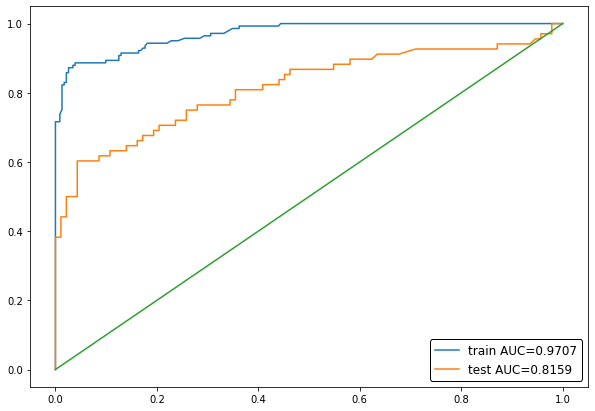

In [114]:
roc_auc_plot(survived_train, survived_train_predicted_grid, survived_test, survived_test_predicted_grid)

In [70]:
# best_train_score = 0.0
# # (grid_lr, grid_rfc, grid_knc)
# for grid in [grid_lr]:
#     grid.fit(train_train, survived_train)
    
#     survived_train_predicted_grid = grid.predict_proba(train_train)[:, 1]
#     survived_test_predicted_grid = grid.predict_proba(train_test)[:, 1]

#     if roc_auc_score(survived_test, survived_test_predicted_grid) > best_train_score:
#         best_train_score = roc_auc_score(survived_test, survived_test_predicted_grid)
#         best_train_prediction = survived_train_predicted_grid
#         best_test_prediction = survived_test_predicted_grid

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


# Отправка данных с ответами

In [59]:
id = test['PassengerId']
test_processed = process_data(test)
survived_prediction = rfc.predict_proba(test_processed)[:, 1]

In [60]:
def create_submission(id_col, y_pred):
    submission = pd.DataFrame({
        'PassengerId': id_col,
        'Survived': y_pred
    })
    return submission

In [61]:
sub = create_submission(id, survived_prediction)

In [62]:
sub

,PassengerId,Survived
0,384,0.913832
1,882,0.083696
2,276,0.886109
3,648,0.346790
4,224,0.091521
...,...,...
352,115,0.659993
353,539,0.147925
354,656,0.310514
355,11,0.543356


In [63]:
sub.to_csv("sub.csv", index=False)